# 挖掘数据中的信息 -- 数据探索之描述性统计


---

## 数据导入




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import brfss

# 设置图像清晰度
%config InlineBackend.figure_format = 'retina' 

In [2]:
# 导入 BRFSS 数据
df = brfss.ReadBrfss()  

In [3]:
bmi_income = df[['bmi','income']].dropna()  # 选取bmi和income两列数据，并舍弃缺失的数据。
bmi_income.head()  # 显示前5行数据

,bmi,income
0,40.18,3.0
1,25.09,1.0
3,28.19,8.0
5,26.52,6.0
6,23.89,4.0


In [4]:
bmi_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343092 entries, 0 to 441455
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   bmi     343092 non-null  float64
 1   income  343092 non-null  float64
dtypes: float64(2)
memory usage: 7.9 MB


In [5]:
bmi_rich = bmi_income[bmi_income.income == 8]['bmi']
bmi_ord = bmi_income[bmi_income.income != 8]['bmi']

In [6]:
bmi_rich.describe()

count    110259.000000
mean         27.450733
std           5.900353
min          12.050000
25%          23.690000
50%          26.570000
75%          30.040000
max          97.650000
Name: bmi, dtype: float64

In [7]:
bmi_ord.describe()

count    232833.000000
mean         28.537320
std           6.971436
min          12.020000
25%          24.030000
50%          27.370000
75%          31.620000
max          97.650000
Name: bmi, dtype: float64



---


## 中心趋势



* **均值**:


In [8]:
mean_rich = bmi_rich.mean()  # 计算均值
mean_ord = bmi_ord.mean()
print('BMI mean of rich people: %.2f' % mean_rich)
print('BMI mean of ordinary people: %.2f' % mean_ord)

BMI mean of rich people: 27.45
BMI mean of ordinary people: 28.54


* **中位数**



In [9]:
median_rich = bmi_rich.median()  # 计算中位数
median_ord = bmi_ord.median()
print('BMI median of rich people: %.2f' % median_rich)
print('BMI median of ordinary people: %.2f' % median_ord)

BMI median of rich people: 26.57
BMI median of ordinary people: 27.37


* **众数**


In [10]:
# 计算富人的众数
mode_rich = bmi_rich.mode().iloc[0]
mode_count_rich = np.sum(bmi_rich == mode_rich)
print('BMI mode of rich people: %.2f (counts %d)' % (mode_rich, mode_count_rich))

# 计算普通人的众数
mode_ord = bmi_ord.mode().iloc[0]
mode_count_ord = np.sum(bmi_ord == mode_ord)
print('BMI mode of ordinary people: %.2f (counts %d)' % (mode_ord, mode_count_ord))

BMI mode of rich people: 26.63 (counts 1246)
BMI mode of ordinary people: 26.63 (counts 2766)


* **均值的差值**



In [11]:
print("mean difference (rich - ordinary) :  %.2f" % (mean_rich - mean_ord))

mean difference (rich - ordinary) :  -1.09



* **直方图**



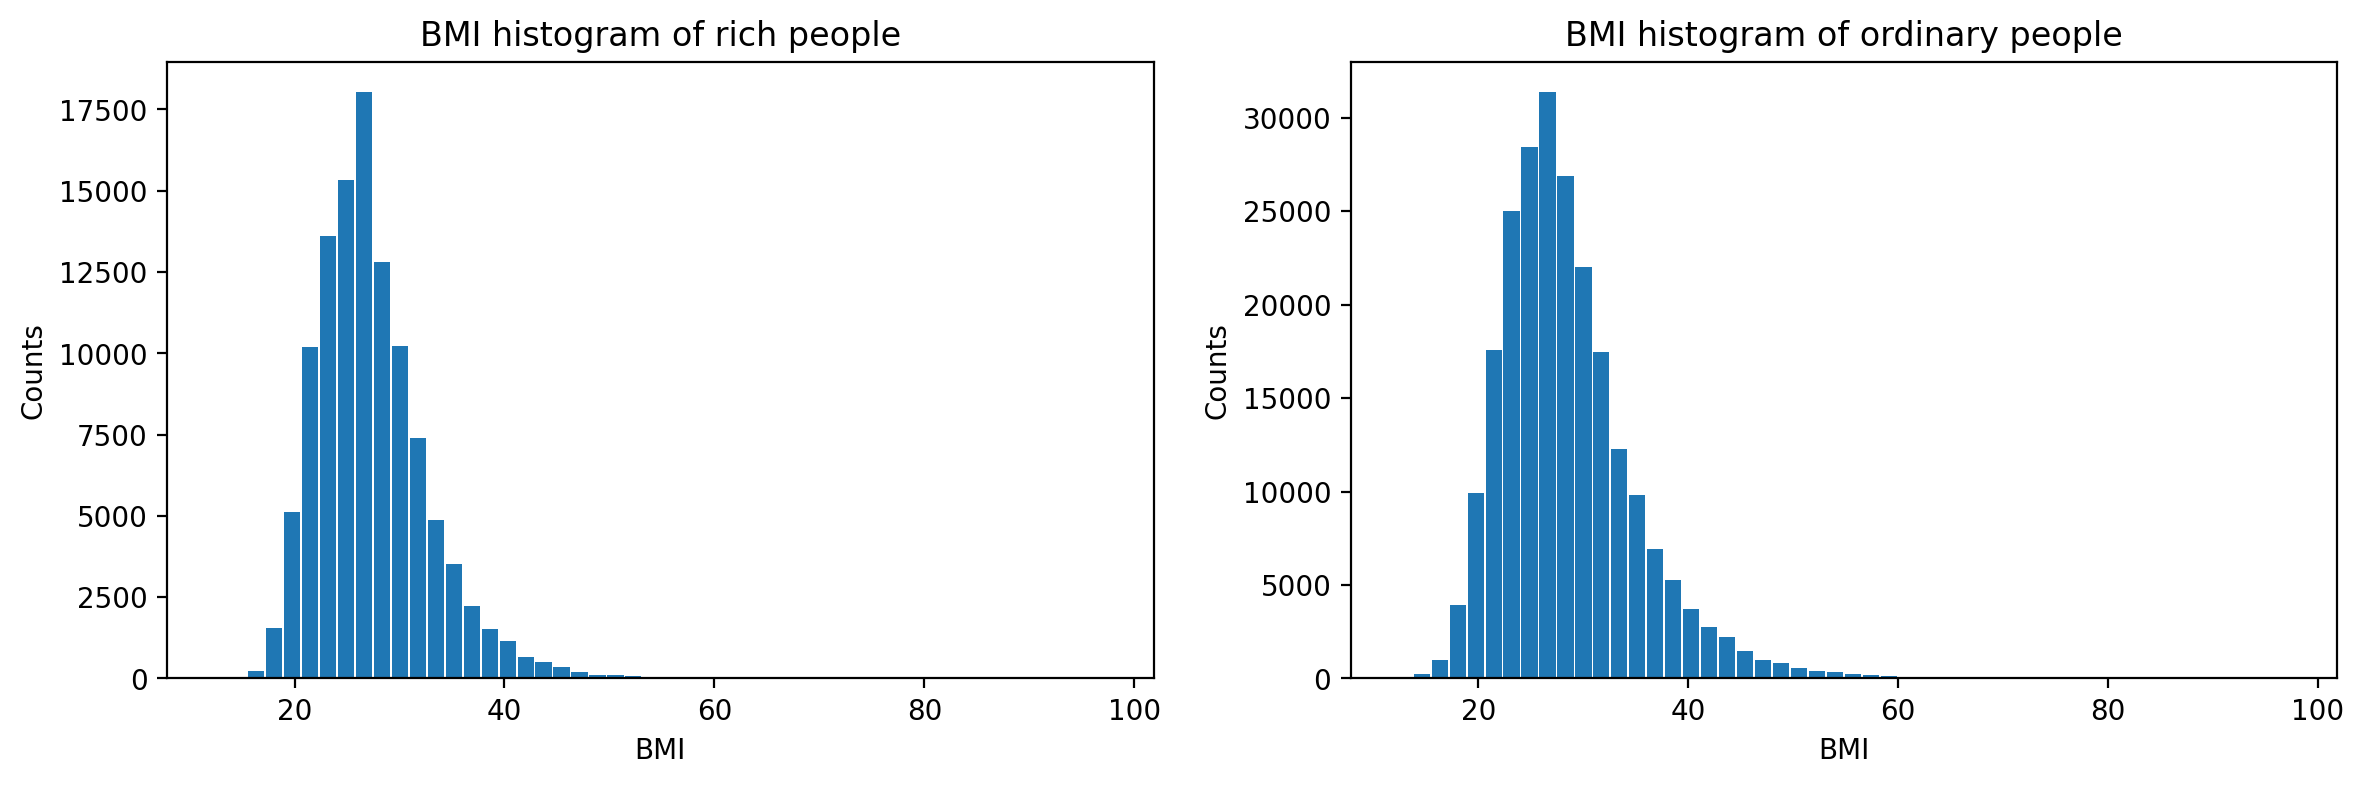

In [12]:
fig = plt.figure(figsize=(14,4))

# 绘制富人bmi数据的直方图
p1 = fig.add_subplot(121)
plt.hist(bmi_rich, bins=50, rwidth=0.9)
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.title('BMI histogram of rich people')

# 绘制普通人bmi数据的直方图
p2 = fig.add_subplot(122)
plt.hist(bmi_ord, bins=50, rwidth=0.9)
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.title('BMI histogram of ordinary people')

plt.show()

AttributeError: Rectangle.set() got an unexpected keyword argument 'normed'

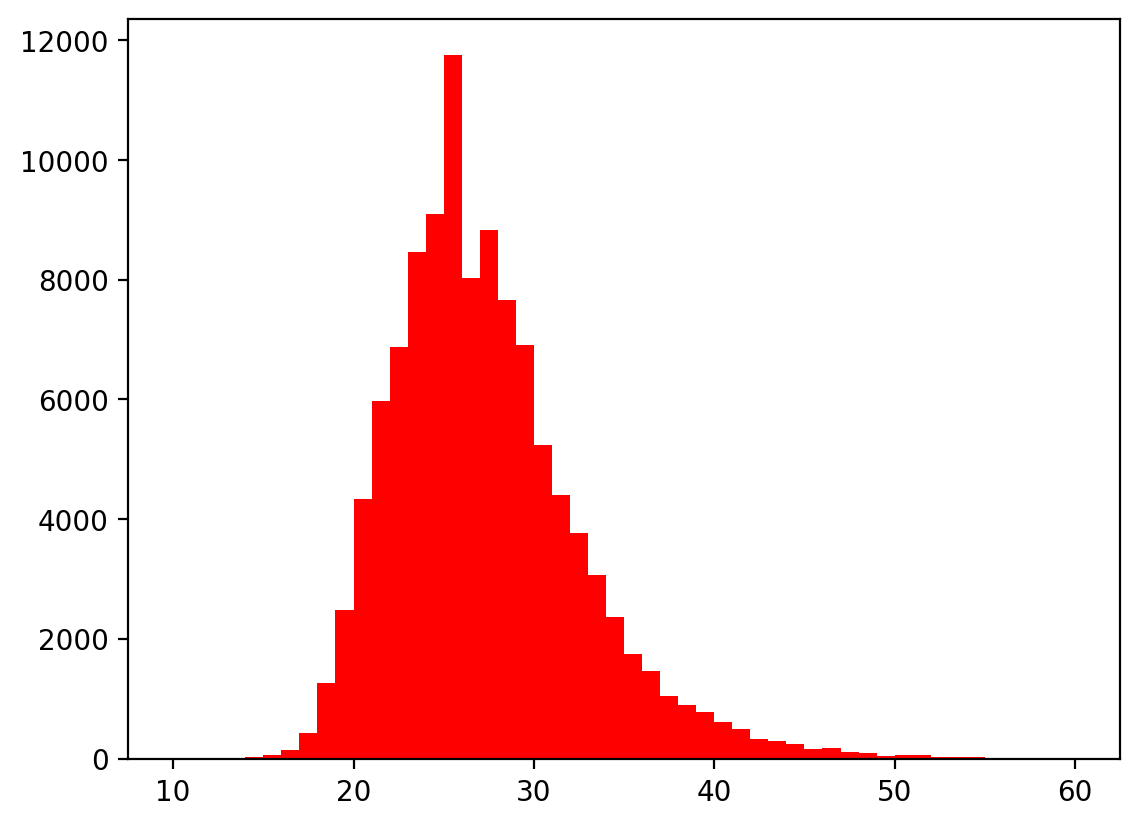

In [13]:
plt.hist(bmi_rich, bins=50, range=(10,60), normed=True, label='rich', alpha=0.4, color='red')
plt.hist(bmi_ord, bins=50, range=(10,60), normed=True, label='ordinary', alpha=0.4, color='blue')
plt.legend()
plt.xlabel('BMI')
plt.ylabel('probability density')
plt.title('BMI histogram')
plt.show()

* **偏度**



In [ ]:
# 计算众数区间
bin_edge = np.arange(10,60,1)
counts, bins = np.histogram(bmi_rich, bin_edge)
mode_left = bins[np.argmax(counts)]
mode_right = bins[np.argmax(counts)+1]
mode_middle = (mode_left + mode_right) / 2
print('mode range: (%.2f, %.2f)' % (mode_left, mode_right))
print('median: %.2f' % median_rich)
print('mean: %.2f' % mean_rich)

# 计算偏度
print('skewness: %.2f' %bmi_rich.skew())


# 做图
plt.axvline(x=mean_rich, linewidth=1, color='red', label='mean')
plt.axvline(x=median_rich, linewidth=1, color='green', label='median')
plt.axvline(x=mode_middle, linewidth=1, color='blue', label='mode')
plt.legend()

plt.hist(bmi_rich, bins=bin_edge, range=(10,60), rwidth=0.9, alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.title('BMI distribution of rich people')
plt.show()

In [ ]:
# 收入水平的分布
print('skewness: %.2f' %bmi_income.income.skew())

bins = np.arange(1,10)
plt.hist(bmi_income.income, align='left', bins=bins, rwidth=0.9)
plt.title('income distribution')
plt.xlabel('income level')
plt.ylabel('counts')
plt.show()

---

## 相对位置

* **ECDF图**





In [ ]:
def ecdf(data): # 计算数据的ECDF值
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return (x,y)

def plot_ecdf(data, xlabel=None , ylabel='ECDF', label=None):     # 绘制ECDF图
    
    x, y = ecdf(data)
 
    _ = plt.plot(x, y, marker='.', markersize=3, linestyle='none', label=label)
    _ = plt.legend(markerscale=4)
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel(ylabel)
    plt.margins(0.02)

plot_ecdf(bmi_rich,label='rich')
plot_ecdf(bmi_ord, xlabel='BMI',label='ordinary')
plt.show()


* **分位数**



In [ ]:
print('min:  ', bmi_rich.min())
print('max:  ', bmi_rich.max())

In [ ]:
q1 = bmi_rich.quantile(0.25)
q2 = bmi_rich.quantile(0.5)
q3 = bmi_rich.quantile(0.75)
IQR = q3 - q1

print('25%:  ', q1)
print('50%:  ', q2)
print('75%:  ', q3)
print('IQR:   %.2f' % IQR)

* **箱图**（box plot）



In [ ]:
# 绘制箱图
bmi_income['income_level'] = bmi_income.income.apply(lambda x: 'rich' if x==8 else 'ordinary')
sns.boxplot(x='income_level', y='bmi', data=bmi_income, palette="Set3")
plt.show()

---

## 离散度



* **方差和标准差**


$$ s = \sqrt{\frac{\sum(x_i - \bar{x})^2}{N-1}}
 （ 其中\bar{x}是均值，N是样本总量）
$$




In [ ]:
var_rich = bmi_rich.var()
std_rich = bmi_rich.std()
print(' For rich people: Variance = %.2f, Standard deviation = %.2f' % (var_rich, std_rich))

var_ord = bmi_ord.var()
std_ord = bmi_ord.std()
print(' For ordinary people: Variance = %.2f, Standard deviation = %.2f' % (var_ord, std_ord))

* **Cohen's d **


$$ d = \frac{\bar{x}_1 - \bar{x}_2}{s_p}  
（其中 s_p = \sqrt{\frac{(n_1 - 1)s_1^2 +(n_2 - 1)s_2^2}{n_1+n_2-2}}，s_1,s_2分别是两样本的标准差 ） $$



In [ ]:
def cohen_d(data1, data2):
    n1 = len(data1)
    n2 = len(data2)
    x1 = np.mean(data1)
    x2 = np.mean(data2)
    var1 = np.var(data1, ddof=1)
    var2 = np.var(data2, ddof=1)
    sp = np.sqrt(((n1-1)*var1+(n2-1)*var2)/(n1+n2-2))
    return (x1-x2)/sp

print("Cohen's d: %.3f" %cohen_d(bmi_rich, bmi_ord))



---


## 相关性




* **协方差**


$$ cov(x,y) = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{N} $$



In [ ]:
df2 = df[['height','weight', 'bmi' ]].dropna()  #从datafrme中取身高、体重和bmi三列数据
height = df2.height
weight = df2.weight
bmi = df2.bmi

np.cov(height,weight) # 计算协方差



* **相关系数**


$$ \rho = \frac{cov(x,y)}{\sigma_x \sigma_y} $$


In [ ]:
np.corrcoef(height, weight)[0,1]  # 计算Pearson相关系数

In [ ]:
# 绘制身高、体重的散点图
plt.plot(height,weight, marker='.', linestyle='none', alpha = 0.05)
plt.xlabel('height (m)')
plt.ylabel('weight (kg)')
plt.title('correlation of weight and height')
plt.show()

In [ ]:
# 计算BMI值和体重的相关系数
corr = np.corrcoef(weight, bmi)
print('Pearson correlation coefficient: %.2f' % corr[0,1] )

# 绘制BMI值和体重的散点图
plt.plot(weight,bmi, marker='.', linestyle='none', alpha = 0.05)
plt.xlabel('weight (kg)')
plt.ylabel('BMI')
plt.title('correlation of weight and BMI')
plt.show()

In [ ]:
# 计算BMI值和身高的相关系数
corr = np.corrcoef(height, bmi)
print('Pearson correlation coefficient: %.4f' % corr[0,1] )

# 绘制BMI值和身高的散点图
plt.plot(height,bmi, marker='.', linestyle='none', alpha = 0.05)
plt.xlabel('height (m)')
plt.ylabel('BMI')
plt.title('correlation of BMI and height')
plt.show()